In [14]:

### Import Packages ###
import pandas as pd
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt

import warnings
import itertools
import numpy as np
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'black'


### Define Parameter Ranges to Test ###

# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = d = q = range(1, 3)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

### Run Grid Search ###

x1=input("Introduce el recurso: (Electricidad/Agua/Gas)")
x2=input("Introduce el codigo del centro:")


data = pd.read_csv(x1+'-'+x2+'.csv', header=0, squeeze=True)


ts= data[['Dia', 'ConsumoDia']]
ts['Dia'] = pd.to_datetime(ts['Dia'])
ts=ts.set_index('Dia')


Introduce el recurso: (Electricidad/Agua/Gas)Electricidad
Introduce el codigo del centro:3
DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', 

,ConsumoDia
Dia,
2014-01-01,191055.652174
2014-02-01,197864.100000
2014-03-01,190816.190476
2014-04-01,164932.090909
2014-05-01,191478.000000
2014-06-01,185563.809524
2014-07-01,209176.956522
2014-08-01,110519.000000
2014-09-01,209979.954545


In [15]:

# Note: this code will take a while to run

# Define function
def sarimax_gridsearch(ts, pdq, pdqs, maxiter=50, freq='MS'):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by BIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts, # this is your time series you will input
                                                order=comb,
                                                seasonal_order=combs, 
                                                enforce_invertibility=False,#Hemos quitado enforce_stationarity=False,
                                                freq=freq)
               
                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.bic])
                print('SARIMAX {} x {}12 : BIC Calculated ={}'.format(comb, combs, output.bic))
            except:
                print('error')
                continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['bic'],ascending=True)
    return ans_df
    
### Apply function to your time series data ###

# Remember to change frequency to match your time series data

#------------------------------------------------------------------------------------------------------------------------
resultado = sarimax_gridsearch(ts, pdq, pdqs, freq='MS')

print(resultado)
#------------------------------------------------------------------------------------------------------------------------


SARIMAX (1, 1, 1) x (1, 1, 1, 12)12 : BIC Calculated =1734.468478964643
SARIMAX (1, 1, 1) x (1, 1, 2, 12)12 : BIC Calculated =1738.3365392365436
SARIMAX (1, 1, 1) x (1, 2, 1, 12)12 : BIC Calculated =1461.6304238163036
SARIMAX (1, 1, 1) x (1, 2, 2, 12)12 : BIC Calculated =1464.3518047351608
SARIMAX (1, 1, 1) x (2, 1, 1, 12)12 : BIC Calculated =1738.5208984032308
SARIMAX (1, 1, 1) x (2, 1, 2, 12)12 : BIC Calculated =1742.5079731239157
SARIMAX (1, 1, 1) x (2, 2, 1, 12)12 : BIC Calculated =1464.3835290270376
SARIMAX (1, 1, 1) x (2, 2, 2, 12)12 : BIC Calculated =1468.2311413843545
SARIMAX (1, 1, 2) x (1, 1, 1, 12)12 : BIC Calculated =1744.6681215110905
SARIMAX (1, 1, 2) x (1, 1, 2, 12)12 : BIC Calculated =1748.6340075831076
SARIMAX (1, 1, 2) x (1, 2, 1, 12)12 : BIC Calculated =1475.2563589097351
SARIMAX (1, 1, 2) x (1, 2, 2, 12)12 : BIC Calculated =1478.2397317679374
SARIMAX (1, 1, 2) x (2, 1, 1, 12)12 : BIC Calculated =1748.752638497707
SARIMAX (1, 1, 2) x (2, 1, 2, 12)12 : BIC Calculated 

                                     SARIMAX Results                                      
Dep. Variable:                         ConsumoDia   No. Observations:                   78
Model:             SARIMAX(2, 2, 1)x(1, 2, 1, 12)   Log Likelihood                -713.724
Date:                            Thu, 27 May 2021   AIC                           1439.448
Time:                                    04:11:22   BIC                           1451.155
Sample:                                01-01-2014   HQIC                          1443.936
                                     - 06-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5129      0.410     -1.250      0.211      -1.317       0.291
ar.L2         -0.2742      0.396   

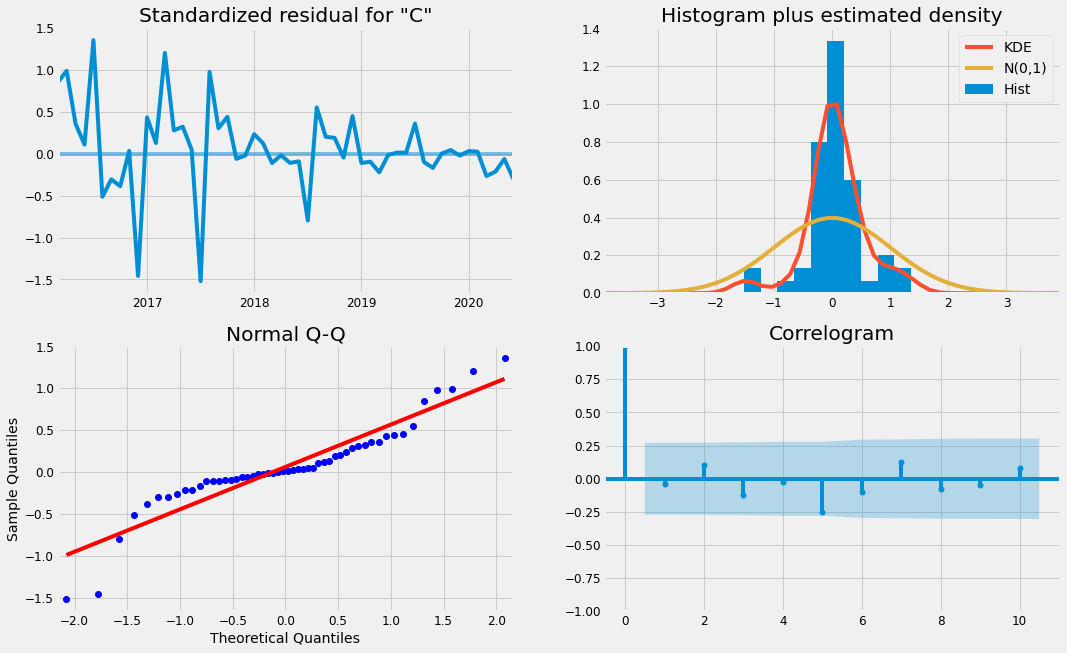

In [16]:

#de lo anterior cogeemos os parametros que esten en el compromiso de bajo BIC pero bajo error cuadratico

# Build SARIMAX model w/optimal parameters
sarimax = sm.tsa.statespace.SARIMAX(ts, 
                                    order=(2,2,1), 
                                    seasonal_order=(1,2,1,12), #hemos quitado enforce_stationarity=False, 
                                    enforce_invertibility=False,
                                    freq='MS')
                                    
# Fit the model
output = sarimax.fit()
    
# Print output summary
print(output.summary())

# Plot diagnostics
output.plot_diagnostics(figsize=(16,10));



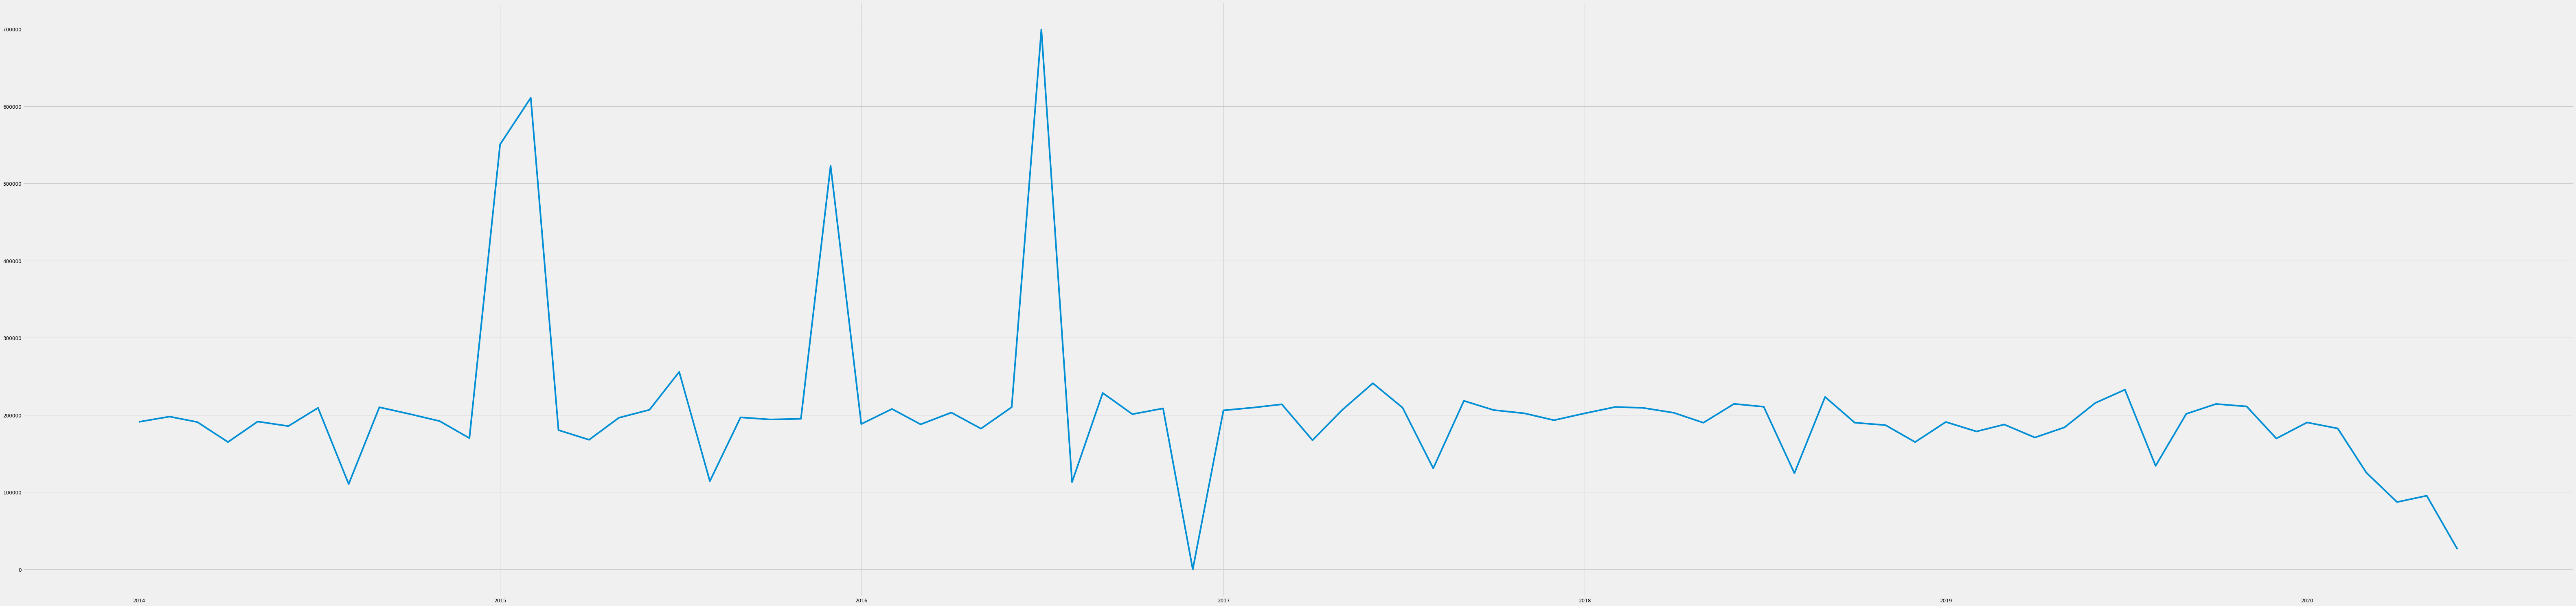

In [17]:
plt.figure(figsize=(100,25))

plt.plot(ts)

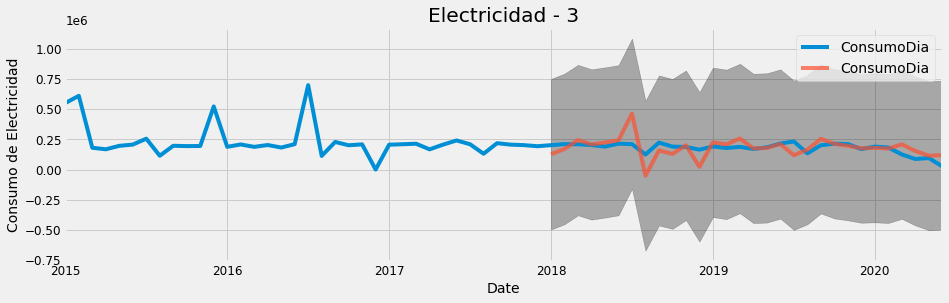

In [18]:
pred = output.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()


mean = {'Dia': pred.predicted_mean.index,
        'ConsumoDia': pred.predicted_mean.values
        }

df_mean = pd.DataFrame(mean, columns = ['Dia', 'ConsumoDia'])

df_mean=df_mean.set_index('Dia')

ax = ts['2015-01-01':].plot(label='observed')

df_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))


ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.3)
                

ax.set_xlabel('Date')
ax.set_ylabel('Consumo de '+ x1)
plt.title(x1 +' - '+x2)

plt.legend()
plt.show()

In [19]:
y_forecasted = df_mean.values
y_truth = ts['2018-01-01':].values

mse = ((y_forecasted - y_truth)**2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 5939977186.89
The Root Mean Squared Error is 77071.25


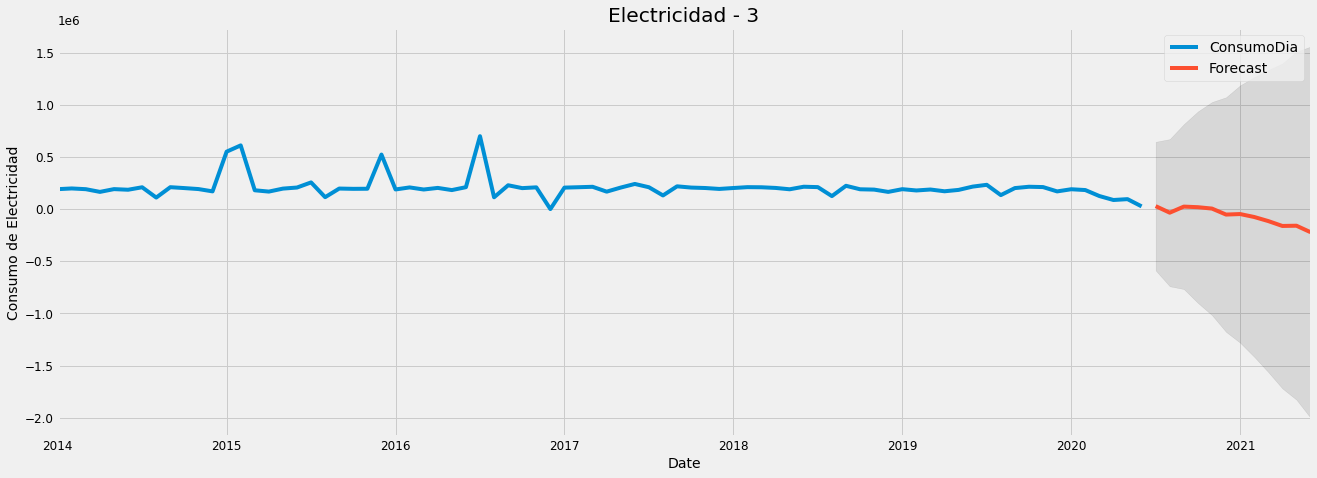

In [31]:
pred_uc = output.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = ts.plot(label='observed', figsize=(20,7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.1)

ax.set_xlabel('Date')
ax.set_ylabel('Consumo de '+ x1)
plt.title(x1 +' - '+x2)

plt.legend()
nombre = 'Prediction_' + x1 + '_' +x2 + '.png'
plt.savefig(nombre)
plt.show()

<Figure size 432x288 with 0 Axes>